# Ejercicio 16
ejemplo de filtro


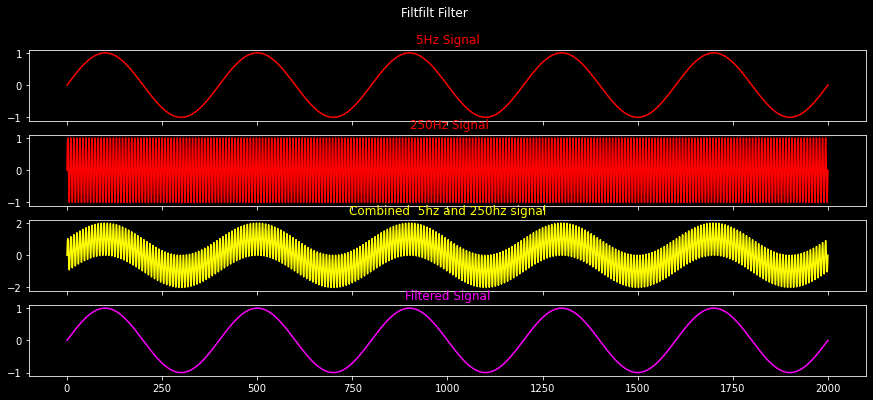

In [2]:
from matplotlib import pyplot as plt
import mysignals as sigs
from scipy import signal
from matplotlib import style
import numpy as np



t = np.linspace(0,1.0,2001)

sig_5hz = np.sin(2*np.pi*5*t)
sig_250hz = np.sin(2*np.pi*250*t)

sig_5hz_250hz = sig_5hz + sig_250hz


b,a = signal.butter(8,0.125)
filtered_signal = signal.filtfilt(b,a,sig_5hz_250hz, padlen=150)




style.use('dark_background')

f, plt_arr =plt.subplots(4,sharex=True)
f.suptitle('Filtfilt Filter')

plt_arr[0].plot(sig_5hz,color='red')
plt_arr[0].set_title("5Hz Signal", color ='red')

plt_arr[1].plot(sig_250hz,color='red')
plt_arr[1].set_title(" 250Hz Signal", color ='red')

plt_arr[2].plot(sig_5hz_250hz,color='yellow')
plt_arr[2].set_title("Combined  5hz and 250hz signal", color ='yellow')

plt_arr[3].plot(filtered_signal,color='magenta')
plt_arr[3].set_title("Filtered Signal", color ='magenta')
plt.rcParams["figure.figsize"] = [15,6]
plt.show()


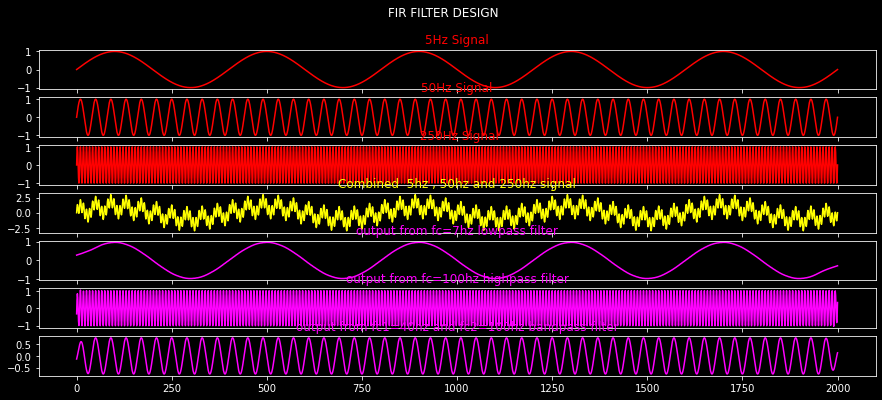

In [3]:
from matplotlib import pyplot as plt
import mysignals as sigs
from scipy import signal
from matplotlib import style
import numpy as np



t = np.linspace(0,1.0,2001)

sig_5hz = np.sin(2*np.pi*5*t)
sig_50hz = np.sin(2*np.pi*50*t)
sig_250hz = np.sin(2*np.pi*250*t)

sig_5hz_50hz_250hz = sig_5hz + sig_50hz + sig_250hz

numtaps = 101
lpf_cutoff = 7
hpf_cutoff = 100
bp_cutoff1 = 40
bp_cutoff2 = 100


#lowpass
lowpass_coef = signal.firwin(numtaps,lpf_cutoff,nyq = 1000)
lpf_output = signal.convolve(sig_5hz_50hz_250hz,lowpass_coef,mode='same')


#highpass
highpass_coef = signal.firwin(numtaps, hpf_cutoff, pass_zero = False, nyq = 1000)
hpf_output = signal.convolve(sig_5hz_50hz_250hz,highpass_coef,mode='same')

#bandpass
bandpass_coef = signal.firwin(numtaps, [bp_cutoff1,bp_cutoff2], pass_zero = False, nyq = 1000)
bandpass_output = signal.convolve(sig_5hz_50hz_250hz,bandpass_coef,mode='same')



style.use('dark_background')

f, plt_arr =plt.subplots(7,sharex=True)
f.suptitle('FIR FILTER DESIGN')

plt_arr[0].plot(sig_5hz,color='red')
plt_arr[0].set_title("5Hz Signal", color ='red')

plt_arr[1].plot(sig_50hz,color='red')
plt_arr[1].set_title("50Hz Signal", color ='red')

plt_arr[2].plot(sig_250hz,color='red')
plt_arr[2].set_title(" 250Hz Signal", color ='red')

plt_arr[3].plot(sig_5hz_50hz_250hz,color='yellow')
plt_arr[3].set_title("Combined  5hz , 50hz and 250hz signal", color ='yellow')

plt_arr[4].plot(lpf_output,color='magenta')
plt_arr[4].set_title("output from fc=7hz lowpass filter", color ='magenta')

plt_arr[5].plot(hpf_output,color='magenta')
plt_arr[5].set_title("output from fc=100hz highpass filter", color ='magenta')

plt_arr[6].plot(bandpass_output,color='magenta')
plt_arr[6].set_title("output from fc1=40hz and fc2=100hz bandpass filter", color ='magenta')

plt.rcParams["figure.figsize"] = [15,6]

plt.show()